In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as shift

In [2]:
def read_signals():
    
    data = [signal.rstrip('\n') for signal in open('Data.txt')]
    signals = []

    for signal in data:
        signals.append(float(signal))
    
    return signals

In [3]:
def rectify(raw_signals):
    
    recitifed_signals = []
    
    for signal in raw_signals:
        
        recitifed_signals.append(np.absolute(signal))
        
    return recitifed_signals

In [4]:
def set_threshold(rectified_signals):
    
    threshold = 3 * np.std(rectified_signals[0:110])
    return threshold
    

In [121]:
def moving_average(signals, threshold, DiffTh, window_size: int=20):
    
    templates = []
    detected_peaks_index = []
 
    avg_vector = [1/20] * 20
    averaged_samples = np.convolve(signals, avg_vector, mode = 'same')   
    end =  len(averaged_samples) - 10
    muap_detected= False
    
    for sample_index in range(10, len(averaged_samples)-10):
        if(averaged_samples[sample_index] > threshold and not(muap_detected)):
            muap_detected = True
            start_index = sample_index-10
            muap_range = signals[sample_index-10:sample_index+10]
            max_sample_index = muap_range.index(max(muap_range)) + start_index
            detected_peaks_index.append(max_sample_index)
            aligned_muap = check_syncronization(signals, muap_range, start_index)
            templates = MUAP_to_MU(aligned_muap, templates, DiffTh)
            print('if:1 index: ', sample_index)
        else:
            if(averaged_samples[sample_index] < threshold and (muap_detected)):
                muap_detected = False
                print('if:2 index: ', sample_index)
            
            
    
    return templates, detected_peaks_index

In [5]:
def check_syncronization(rectified_signals, MUAP, signal_index, window_size: int= 20):
    
    centre = int(window_size/2)
    peak_position = MUAP.index(max(MUAP))
    
    if(not(peak_position==centre)):
        
        original_peak_position = peak_position + signal_index
        start = original_peak_position - centre
        end = original_peak_position + centre
        sub_MUAP = rectified_signals[start:end] 
        return sub_MUAP
    return MUAP

In [112]:
def MUAP_to_MU(samples, templates, DiffTh):
    
    updated_templates =[] 
    
    if(len(templates) == 0):
        
        templates.append(samples)
        
        return templates
        
    else:
        differences = []  
        for template_index in range(len(templates)):
            difference = sum([(sampleM - sampleK)**2 for sampleM, sampleK in zip(samples, templates[template_index])])
            if(difference < DiffTh):
                differences.append(difference)

        if(len(differences) == 0):
            templates.append(samples)
        else:
            min_difference = differences.index(min(differences)) 
            new_template = [(M + K)/2 for M, K in zip(samples, templates[min_difference])]
            templates[min_difference] = new_template
     
            
#     print('returning length of : ',len(updated_templates))       
    return templates

In [87]:
def decompose_EMG(signals, window_size: int=20):
    
#     xaxis = np.arange(0,500)
    rectified_signals = rectify(signals)
    threshold = set_threshold(rectified_signals)
    avg_samples, peaks = moving_average(rectified_signals, 11.7, DiffTh)
    return avg_samples, peaks


In [122]:
DiffTh = 12.65 ** 5
signals = read_signals()
templates, peaks =decompose_EMG(signals)


if:1 index:  129
if:2 index:  150
if:1 index:  252
if:2 index:  259
if:1 index:  261
if:2 index:  262
if:1 index:  294
if:2 index:  331
if:1 index:  332
if:2 index:  333
if:1 index:  369
if:2 index:  448
if:1 index:  918
if:2 index:  939
if:1 index:  962
if:2 index:  965
if:1 index:  1281
if:2 index:  1303
if:1 index:  1449
if:2 index:  1472
if:1 index:  1480
if:2 index:  1482
if:1 index:  1577
if:2 index:  1599
if:1 index:  2062
if:2 index:  2079
if:1 index:  2324
if:2 index:  2363
if:1 index:  2459
if:2 index:  2461
if:1 index:  2598
if:2 index:  2609
if:1 index:  2620
if:2 index:  2665
if:1 index:  2711
if:2 index:  2753
if:1 index:  2857
if:2 index:  2882
if:1 index:  2947
if:2 index:  2957
if:1 index:  2959
if:2 index:  2960
if:1 index:  2962
if:2 index:  2991
if:1 index:  3058
if:2 index:  3079
if:1 index:  3105
if:2 index:  3110
if:1 index:  3419
if:2 index:  3442
if:1 index:  3730
if:2 index:  3753
if:1 index:  3754
if:2 index:  3757
if:1 index:  4166
if:2 index:  4206
if:1 ind

if:1 index:  58230
if:2 index:  58253
if:1 index:  58262
if:2 index:  58291
if:1 index:  58486
if:2 index:  58487
if:1 index:  58490
if:2 index:  58511
if:1 index:  58749
if:2 index:  58773
if:1 index:  58834
if:2 index:  58855
if:1 index:  58869
if:2 index:  58911
if:1 index:  59115
if:2 index:  59178
if:1 index:  59232
if:2 index:  59241
if:1 index:  59414
if:2 index:  59454
if:1 index:  59550
if:2 index:  59551
if:1 index:  59553
if:2 index:  59565
if:1 index:  59913
if:2 index:  59938
if:1 index:  60306
if:2 index:  60307
if:1 index:  60308
if:2 index:  60330
if:1 index:  60419
if:2 index:  60442
if:1 index:  60479
if:2 index:  60501
if:1 index:  60619
if:2 index:  60660
if:1 index:  60707
if:2 index:  60728
if:1 index:  60811
if:2 index:  60823
if:1 index:  61072
if:2 index:  61112
if:1 index:  61119
if:2 index:  61161
if:1 index:  61496
if:2 index:  61497
if:1 index:  61498
if:2 index:  61524
if:1 index:  61556
if:2 index:  61572
if:1 index:  61896
if:2 index:  61916
if:1 index: 

In [114]:
rectified_signals = rectify(signals)
i = 0
for peak in peaks:
    if(peak>= 30000 and peak < 35000):
        i+=1
print(i)

43


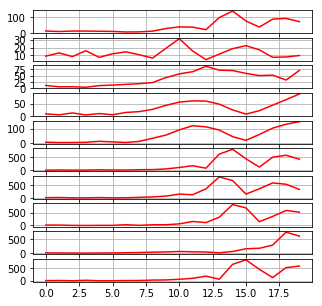

In [67]:
xaxis = np.arange(0,20)
subs = len(templates)
figure, ax = plt.subplots(10, 1, figsize=(5, 5))
for i in range(0,10):
    ax[i].grid()
    ax[i].plot(xaxis, templates[i], color='red')
#     ax[i].title.set_text('Sample Number: ' + str(i))
   



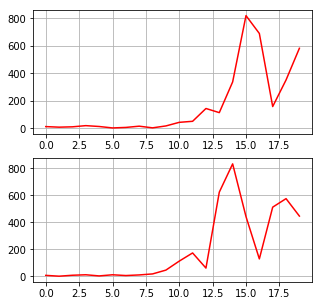

In [64]:
xaxis = np.arange(0,20)
subs = len(templates)
figure, ax = plt.subplots(2,1, figsize=(5, 5))
ax[0].grid()
ax[0].plot(xaxis, templates[3], color='red')
ax[1].grid()
ax[1].plot(xaxis, templates[4], color='red')
#     ax[i].title.set_text('Sample Number: ' + str(i))
   

In [94]:
print(len(templates))


6


In [114]:
print((np.average(rectified_signals[954:974])))

11.8046035


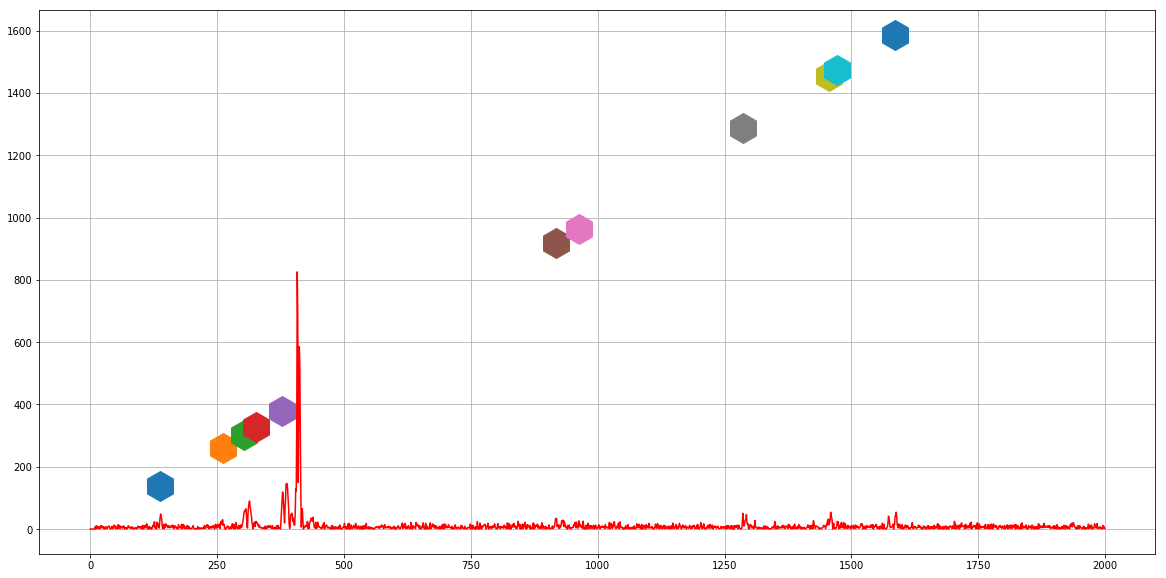

In [120]:
rectified_signals = rectify(signals)


RR_figure, RR_ax = plt.subplots(figsize=(20, 10))
x= np.arange(0,2000)
y= rectified_signals[0:2000]

RR_ax.plot(x,y, color='red')
# RR_ax.set_title('DetectedR_5', fontsize= 30)
RR_ax.grid()
for i, v in enumerate(x):
        if v in peaks:
            plt.plot(x[i], v,  marker='h', markersize=30)

In [105]:
x =[3,4,5]
y = [3,4,5]
r = x+y
print(np.divide(r,2))

[1.5 2.  2.5 1.5 2.  2.5]


In [30]:
print(list_l)

[0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05]
